In [25]:
import pandas as pd
from urllib.request import urlopen
import unidecode
from bs4 import BeautifulSoup
import numpy as np


In [14]:
dpoy_table = pd.read_csv('DPOY.csv')
print(dpoy_table.head())


    Season   Lg                           Player Voting  Age   Tm   G    MP  \
0  2020-21  NBA            Rudy Gobert\goberru01    (V)   28  UTA  71  30.8   
1  2019-20  NBA  Giannis Antetokounmpo\antetgi01    (V)   25  MIL  63  30.4   
2  2018-19  NBA            Rudy Gobert\goberru01    (V)   26  UTA  81  31.8   
3  2017-18  NBA            Rudy Gobert\goberru01    (V)   25  UTA  56  32.4   
4  2016-17  NBA         Draymond Green\greendr01    (V)   26  GSW  76  32.5   

    PTS   TRB  AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  
0  14.3  13.5  1.3  0.6  2.7  0.675  0.000  0.623  11.3  0.248  
1  29.5  13.6  5.6  1.0  1.0  0.553  0.304  0.633  11.1  0.279  
2  15.9  12.9  2.0  0.8  2.3  0.669    NaN  0.636  14.4  0.268  
3  13.5  10.7  1.4  0.8  2.3  0.622    NaN  0.682   8.1  0.214  
4  10.2   7.9  7.0  2.0  1.4  0.418  0.308  0.709   8.2  0.160  


In [20]:
print(dpoy_table.columns)
dpoy_table.to_csv('test.csv')
player_list = dpoy_table['Player'].tolist()
seasons_list = dpoy_table['Season'].tolist()
player_names = []
player_links = []
player_seasons = []
i = 0
for player in player_list: 
    player_links.append(player.split('\\')[1])
    player_names.append(player.split('\\')[0])
    player_seasons.append(seasons_list[i])
    i += 1
print(player_names)
print(player_links)
print(player_seasons)

Index(['Season', 'Lg', 'Player', 'Voting', 'Age', 'Tm', 'G', 'MP', 'PTS',
       'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'],
      dtype='object')
['Rudy Gobert', 'Giannis Antetokounmpo', 'Rudy Gobert', 'Rudy Gobert', 'Draymond Green', 'Kawhi Leonard', 'Kawhi Leonard', 'Joakim Noah', 'Marc Gasol', 'Tyson Chandler', 'Dwight Howard', 'Dwight Howard', 'Dwight Howard', 'Kevin Garnett', 'Marcus Camby', 'Ben Wallace', 'Ben Wallace', 'Metta World Peace', 'Ben Wallace', 'Ben Wallace', 'Dikembe Mutombo', 'Alonzo Mourning', 'Alonzo Mourning', 'Dikembe Mutombo', 'Dikembe Mutombo', 'Gary Payton', 'Dikembe Mutombo', 'Hakeem Olajuwon', 'Hakeem Olajuwon', 'David Robinson', 'Dennis Rodman', 'Dennis Rodman', 'Mark Eaton', 'Michael Jordan', 'Michael Cooper', 'Alvin Robertson', 'Mark Eaton', 'Sidney Moncrief', 'Sidney Moncrief']
['goberru01', 'antetgi01', 'goberru01', 'goberru01', 'greendr01', 'leonaka01', 'leonaka01', 'noahjo01', 'gasolma01', 'chandty01', 'howardw01', 'howardw01', '

In [27]:
dpoy_stats = []
for i in range(len(player_links)):
    html_text = urlopen(f'https://www.basketball-reference.com/players/{player_links[i][0]}/{player_links[i]}.html')
    soup = BeautifulSoup(html_text.read(), 'lxml')
    basic_table = soup.find('table', {'id': 'per_game'})
    advanced_table = soup.find('table', {'id': 'advanced'})
    basic_table = pd.read_html(str(basic_table))[0]
    advanced_table = pd.read_html(str(advanced_table))[0]

    basic_table = basic_table[basic_table['Season']==player_seasons[i]]
    advanced_table = advanced_table[advanced_table['Season']==player_seasons[i]]

    dpoy_stats.append([basic_table['TRB'].tolist()[0], basic_table['STL'].tolist()[0], basic_table['BLK'].tolist()[0],
                      advanced_table['TRB%'].tolist()[0], advanced_table['STL%'].tolist()[0], advanced_table['BLK%'].tolist()[0], advanced_table['DBPM'].tolist()[0]])

dpoy_stats = np.array(dpoy_stats).astype(float)
print(dpoy_stats)    

[[13.5  0.6  2.7 23.3  0.9  7.   2.8]
 [13.6  1.   1.  22.1  1.5  3.   4.1]
 [12.9  0.8  2.3 21.9  1.2  5.8  2.5]
 [10.7  0.8  2.3 18.8  1.2  6.   2.5]
 [ 7.9  2.   1.4 13.3  3.   3.4  3.9]
 [ 6.8  1.8  1.  11.8  2.8  2.3  3. ]
 [ 7.2  2.3  0.8 12.9  3.7  1.8  3.1]
 [11.3  1.2  1.5 18.2  1.9  3.3  3.6]
 [ 7.8  1.   1.7 13.1  1.6  4.1  3.1]
 [ 9.9  0.9  1.4 17.2  1.4  3.4  1.1]
 [14.1  1.4  2.4 21.8  1.9  4.9  2.4]
 [13.2  0.9  2.8 22.   1.4  6.   2.8]
 [13.8  1.   2.9 21.8  1.4  5.9  2.4]
 [ 9.2  1.4  1.3 16.8  2.3  3.1  3.5]
 [11.7  1.2  3.3 19.4  1.8  7.   3.9]
 [11.3  1.8  2.2 19.   2.8  4.6  3.1]
 [12.2  1.4  2.4 19.8  2.2  5.   2.6]
 [ 5.3  2.1  0.7  8.4  3.1  1.4  1.9]
 [15.4  1.4  3.2 23.2  2.   5.9  3.5]
 [13.   1.7  3.5 21.   2.5  6.7  3.3]
 [13.5  0.4  2.7 21.9  0.6  5.6  1.3]
 [ 9.5  0.5  3.7 15.9  0.8  7.8  2.2]
 [11.   0.7  3.9 17.5  1.1  7.7  2.2]
 [11.4  0.4  3.4 18.8  0.6  6.6  1.4]
 [11.6  0.6  3.3 18.6  0.9  7.   2.4]
 [ 4.2  2.9  0.2  6.3  3.7  0.5  1.8]
 [12.5  0.5 

In [28]:
print(len(dpoy_stats))

39


In [39]:
from random import randint

season = 2021
non_dpoy_stats = []
while season >= 1983:
    print(season)
    html_text = urlopen(f'https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html')
    soup = BeautifulSoup(html_text.read(), 'lxml')
    basic_table = soup.find('table', {'id': 'per_game_stats'})
    basic_table = pd.read_html(str(basic_table))[0]

    html_text = urlopen(f'https://www.basketball-reference.com/leagues/NBA_{season}_advanced.html')
    soup = BeautifulSoup(html_text.read(), 'lxml')
    advanced_table = soup.find('table', {'id': 'advanced_stats'})
    advanced_table = pd.read_html(str(advanced_table))[0]

    basic_table = basic_table[basic_table['Player'] != 'Player']
    advanced_table = advanced_table[advanced_table['Player'] != 'Player']

    basic_table = basic_table[~basic_table['Player'].isin(player_names)]
    advanced_table = advanced_table[~advanced_table['Player'].isin(player_names)]

    table_length = len(basic_table)
    for i in range(5):
        print(i)
        random_player_index = randint(0, table_length-1)
        basic_stats = basic_table.iloc[random_player_index]
        advanced_stats = advanced_table.iloc[random_player_index]
        print([basic_stats['TRB'], basic_stats['STL'], basic_stats['BLK'],
               advanced_stats['TRB%'], advanced_stats['STL%'], advanced_stats['BLK%'], advanced_stats['DBPM']])
        non_dpoy_stats.append([basic_stats['TRB'], basic_stats['STL'], basic_stats['BLK'],
                                advanced_stats['TRB%'], advanced_stats['STL%'], advanced_stats['BLK%'], advanced_stats['DBPM']])    
    season-= 1

2021
0
['1.1', '0.3', '0.3', '5.7', '1.5', '2.3', '-0.6']
1
['5.0', '0.6', '0.6', '20.8', '2.1', '3.8', '1.1']
2
['3.5', '0.6', '0.9', '8.3', '1.4', '3.7', '0.0']
3
['3.3', '0.5', '0.7', '14.9', '1.9', '4.8', '0.8']
4
['7.4', '0.5', '0.5', '15.9', '0.9', '1.6', '-2.7']
2020
0
['9.8', '0.6', '0.3', '17.1', '0.9', '0.9', '-0.5']
1
['6.2', '1.1', '1.2', '14.7', '2.3', '4.8', '1.6']
2
['2.4', '0.8', '0.3', '5.3', '1.5', '1.0', '-1.7']
3
['5.7', '0.6', '1.4', '17.3', '1.5', '7.1', '2.0']
4
['4.7', '0.9', '0.3', '8.1', '1.4', '0.8', '-1.1']
2019
0
['1.1', '0.3', '0.0', '8.6', '1.9', '0.0', '-2.0']
1
['13.1', '0.6', '1.1', '23.5', '1.0', '3.0', '1.3']
2
['6.3', '0.3', '0.9', '16.5', '0.8', '3.8', '-0.3']
3
['2.4', '0.6', '0.3', '4.6', '1.0', '0.7', '-0.8']
4
['2.0', '1.0', '0.0', '8.9', '4.0', '0.0', '-1.3']
2018
0
['3.4', '0.5', '0.3', '13.1', '1.8', '1.6', '0.6']
1
['6.3', '1.7', '0.4', '11.1', '2.6', '1.2', '0.4']
2
['8.2', '1.0', '0.9', '15.3', '1.6', '2.4', '-0.3']
3
['1.6', '1.2', '0.1'

In [40]:
print(len(non_dpoy_stats))

195


In [41]:
labels = []
for i in range(len(dpoy_stats)):
    labels.append(1)

for i in range(len(non_dpoy_stats)):
    labels.append(0)

    

In [43]:
from sklearn.model_selection import train_test_split

dpoy_stats = np.array(dpoy_stats)
non_dpoy_stats = np.array(non_dpoy_stats)

x_data = np.concatenate((dpoy_stats, non_dpoy_stats), axis=0)
y_data = np.array(labels)  

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


LogisticRegression()

In [45]:
predictions = logisticRegr.predict(x_test)
print(predictions)
score = logisticRegr.score(x_test, y_test)
print(score)


[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0]
0.9361702127659575


C:\Users\kaiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:578: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, input_name="X", **check_params)
C:\Users\kaiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:578: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, input_name="X", **check_params)


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[38  0]
 [ 3  6]]


Text(0.5, 1.0, 'Accuracy Score: 0.9361702127659575')

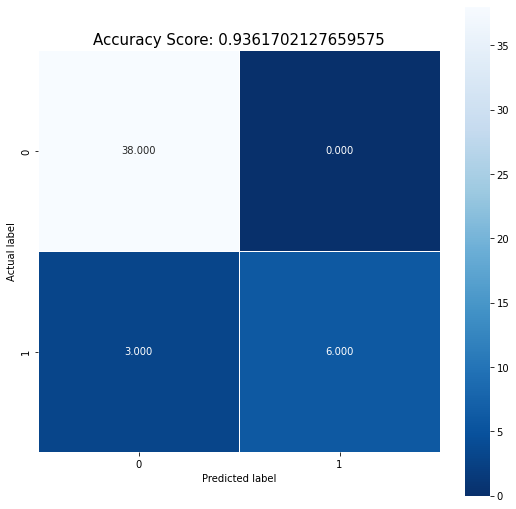

In [47]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,
            square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)


In [48]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_data, y_data)


LogisticRegression()

In [51]:
import pickle
pickle.dump(logistic_regression, open('DPOY_classifier.pkl', 'wb'))
